# Carregamento da base de dados de faces

In [7]:
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# import zipfile
# path = r'D:\Estudo e Cursos\Visão Computacional\Visão Computacional - O Guia Completo\Datasets\yalefaces.zip'
# zip_object = zipfile.ZipFile(file=path, mode='r')
# zip_object.extractall('./')
# zip_object.close()

# Pré-processamento das imagens

In [3]:
import os
print(os.listdir(r'D:\Estudo e Cursos\Visão Computacional\Visão Computacional - O Guia Completo\Reconhecimento Facial\yalefaces\train'))


['subject01.glasses.gif', 'subject01.leftlight.gif', 'subject01.noglasses.gif', 'subject01.normal.gif', 'subject01.rightlight.gif', 'subject01.sad.gif', 'subject01.sleepy.gif', 'subject01.surprised.gif', 'subject01.wink.gif', 'subject02.glasses.gif', 'subject02.happy.gif', 'subject02.noglasses.gif', 'subject02.normal.gif', 'subject02.rightlight.gif', 'subject02.sad.gif', 'subject02.sleepy.gif', 'subject02.surprised.gif', 'subject02.wink.gif', 'subject03.centerlight.gif', 'subject03.happy.gif', 'subject03.noglasses.gif', 'subject03.normal.gif', 'subject03.rightlight.gif', 'subject03.sad.gif', 'subject03.sleepy.gif', 'subject03.surprised.gif', 'subject03.wink.gif', 'subject04.centerlight.gif', 'subject04.glasses.gif', 'subject04.happy.gif', 'subject04.noglasses.gif', 'subject04.normal.gif', 'subject04.rightlight.gif', 'subject04.sad.gif', 'subject04.sleepy.gif', 'subject04.wink.gif', 'subject05.centerlight.gif', 'subject05.glasses.gif', 'subject05.happy.gif', 'subject05.leftlight.gif', '

In [4]:
def get_image_data():
    paths = [
        os.path.join(r'D:\Estudo e Cursos\Visão Computacional\Visão Computacional - O Guia Completo\Reconhecimento Facial\yalefaces\train', f)
        for f in os.listdir(r'D:\Estudo e Cursos\Visão Computacional\Visão Computacional - O Guia Completo\Reconhecimento Facial\yalefaces\train')
    ]
    #print(paths)
    faces = []
    ids = []
    for path in paths:
        #print(path)
        imagem = Image.open(path).convert('L')
        #print(type(imagem))
        imagem_np = np.array(imagem, 'uint8')
        #print(type(imagem_np))
        #print(os.path.split(path)[1])
        id = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))
        print(id)
        ids.append(id)
        faces.append(imagem_np)
    return np.array(ids), faces






In [5]:
ids, faces = get_image_data()
ids

1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
6
7
7
7
7
7
7
7
7
7
8
8
8
8
8
8
8
8
8
9
9
9
9
9
9
9
9
9
10
10
10
10
10
10
10
10
10
11
11
11
11
11
11
11
11
11
12
12
12
12
12
12
12
12
12
13
13
13
13
13
13
13
13
13
14
14
14
14
14
14
14
14
14
15
15
15
15
15
15
15
15
15


array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15])

In [6]:
len(ids)

135

In [7]:
len(faces)

135

In [8]:
faces[0], faces[0].shape

(array([[130, 130, 130, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 252, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8),
 (243, 320))

In [9]:
#núemro de pixels de cada imagem
243 * 320

77760

# Treinamento do classificador LBPH

In [10]:
lbph_classifier = cv2.face.LBPHFaceRecognizer_create(radius=9, neighbors=14, grid_x=9, grid_y=9)
lbph_classifier.train(faces, ids)
lbph_classifier.write('lbph_classifier.yml')


# Reconhecimento de faces

In [11]:
lbph_face_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_face_classifier.read('lbph_classifier.yml')

In [12]:
imagem_teste = r'D:\Estudo e Cursos\Visão Computacional\Visão Computacional - O Guia Completo\Reconhecimento Facial\yalefaces\test\subject10.sad.gif'


In [13]:
imagem = Image.open(imagem_teste).convert('L')
imagem_np = np.array(imagem, 'uint8')
imagem_np

array([[130, 130, 130, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 241, 255, 255],
       [255, 255, 255, ..., 234, 237, 252],
       [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8)

In [14]:
imagem_np.shape

(243, 320)

In [15]:
previsao = lbph_face_classifier.predict(imagem_np)
previsao

(10, 38.2196356776754)

In [16]:
previsao[0]

10

In [17]:
saida_esperada = int(os.path.split(imagem_teste)[1].split('.')[0].replace('subject', ''))
saida_esperada

10

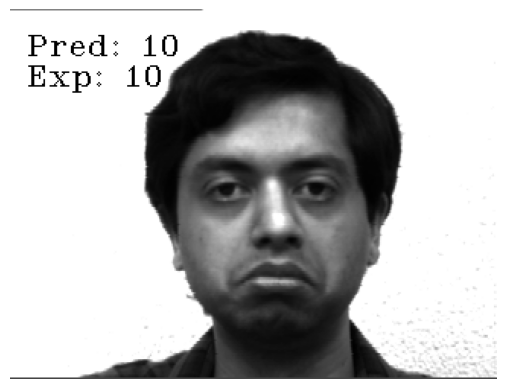

In [18]:
cv2.putText(imagem_np, 'Pred: ' + str(previsao[0]), (10, 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 255, 0))
cv2.putText(imagem_np, 'Exp: ' + str(saida_esperada), (10, 50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 255, 0))
plt.axis('off')
plt.imshow(cv2.cvtColor(imagem_np, cv2.COLOR_BGR2RGB))
plt.show()

# Avaliação do classificador


In [19]:
paths = [os.path.join(r'D:\Estudo e Cursos\Visão Computacional\Visão Computacional - O Guia Completo\Reconhecimento Facial\yalefaces\test', f)
         for f in os.listdir(r'D:\Estudo e Cursos\Visão Computacional\Visão Computacional - O Guia Completo\Reconhecimento Facial\yalefaces\test')
        ]
previsoes = []
saidas_esperadas = []
for path in paths:
    #print(path)
    imagem = Image.open(path).convert('L')
    imagem_np = np.array(imagem, 'uint8')
    previsao, _ = lbph_face_classifier.predict(imagem_np)
    #print(previsao)
    saida_esperada = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))
    #print(saida_esperada)
    previsoes.append(previsao)
    saidas_esperadas.append(saida_esperada)


In [20]:
type(previsoes), type(saidas_esperadas)

(list, list)

In [21]:
previsoes = np.array(previsoes)
saidas_esperadas = np.array(saidas_esperadas)

In [22]:
type(previsoes), type(saidas_esperadas)

(numpy.ndarray, numpy.ndarray)

In [23]:
previsoes

array([ 4,  1,  4,  2,  3,  3,  4,  4,  5,  5,  6, 14,  7,  9,  8,  4,  7,
        9,  4, 10, 11, 11, 12, 12, 13, 13, 14, 14,  7, 15])

In [24]:
saidas_esperadas

array([ 1,  1,  2,  2,  3,  3,  4,  4,  5,  5,  6,  6,  7,  7,  8,  8,  9,
        9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15])

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(saidas_esperadas, previsoes)

0.7333333333333333

In [26]:
len(previsoes)

30

In [30]:
30 * 0.73

21.9

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(saidas_esperadas, previsoes)
cm

array([[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]])

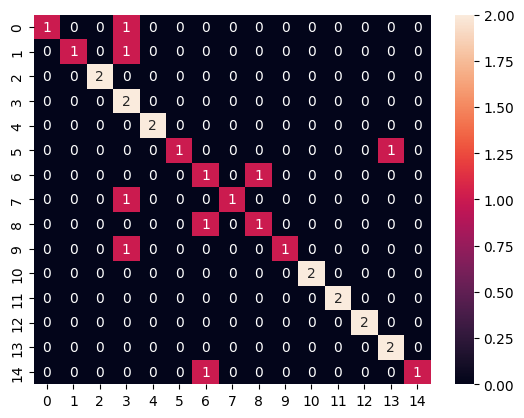

In [29]:
import seaborn
seaborn.heatmap(cm, annot=True);

# Dlib


In [1]:
import dlib

In [5]:
detector_face = dlib.get_frontal_face_detector()
detector_pontos = dlib.shape_predictor(r'../Weights/shape_predictor_68_face_landmarks.dat' )    



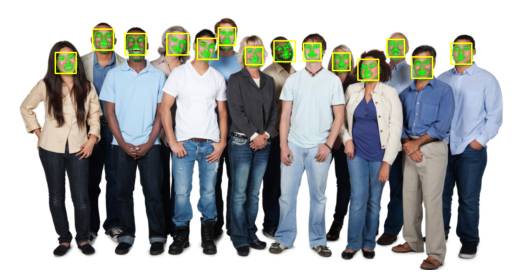

In [15]:
imagem = cv2.imread('../Images/people2.jpg')
deteccoes = detector_face(imagem, 1)
for face in deteccoes:
    pontos = detector_pontos(imagem, face)
    for ponto in pontos.parts():
        cv2.circle(imagem, (ponto.x, ponto.y), 2, (0, 255, 0), 1)
    #print(pontos.parts())
    #print(len(pontos.parts()))
    l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
    cv2.rectangle(imagem, (l, t), (r, b), (0, 255, 255), 2)
plt.axis('off')
plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))
plt.show()

